In [1]:
import albumentations as A
import cv2

import sys
import os
from matplotlib import pyplot as plt


In [2]:
!pwd

/home/pasannissanka/Projects/SignRecognition/code/notebooks


In [ ]:
sys.path.insert(0, '../scripts')

import extract_annotations as E

## Extract Data/ Annotations

In [5]:
RAW_DATA = E.extract()

In [13]:
LABELS = RAW_DATA["labels"]
DATA = RAW_DATA['data']
print(len(DATA))
print(DATA[0])

1163
['/home/pasannissanka/Projects/SignRecognition/code/notebooks/../scripts/../data/027_png.rf.9b51ee336df83be640dc969ceb3a45a8.jpg', [[0.44609375, 0.4890625, 0.0703125, 0.071875, 'pedestrian_crossing_ahead']]]


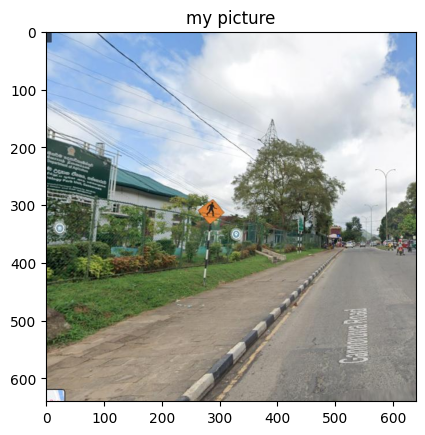

In [8]:
d = DATA[0]
bbox_1 = d[1]

img = cv2.imread(d[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('my picture')
plt.show()

In [9]:
print(bbox_1)

[[0.44609375, 0.4890625, 0.0703125, 0.071875, 'pedestrian_crossing_ahead']]


In [10]:
transform = A.Compose([
    A.RandomCrop(width=450, height=450),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='yolo'))

In [11]:
transformed = transform(image=img, bboxes=bbox_1)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

print(transformed_bboxes)

[(0.44333333333333336, 0.5422222222222223, 0.10000000000000003, 0.10222222222222227, 'pedestrian_crossing_ahead')]


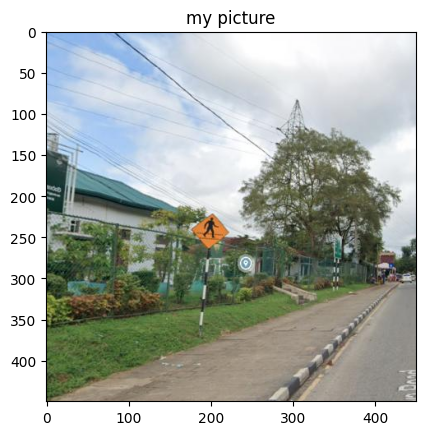

In [12]:
plt.imshow(transformed_image)
plt.title('my picture')
plt.show()

## Filter for specific classes
